In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from categorical_encoder import CategoricalEncoder,DataFrameSelector
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split


In [4]:
filr = os.path.join(os.getcwd(),'data','loan_problem_3.csv')
df = pd.read_csv(filr)
df1 = df.dropna()

In [6]:
cat_features = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
num_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [7]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_features)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [8]:
X = full_pipeline.fit_transform(df1)
y,y_cats = df1['Loan_Status'].factorize()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
logreg = LogisticRegression()
svm_model_rbf = svm.SVC(kernel='rbf',probability=True)

In [10]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
svm_model_rbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
preds_rbf = svm_model_rbf.predict(X_test)
proba_rbf  = svm_model_rbf.predict_proba(X_test)

In [14]:
preds = logreg.predict(X_test)
proba  = logreg.predict_proba(X_test)

In [16]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test,preds))

Classification Report for Logistic Regression:
             precision    recall  f1-score   support

          0       1.00      0.36      0.53        44
          1       0.78      1.00      0.88       100

avg / total       0.85      0.81      0.77       144



In [17]:
print("Classification Report for SVM with RBF Kernel:")
print(classification_report(y_test,preds_rbf))

Classification Report for SVM with RBF Kernel:
             precision    recall  f1-score   support

          0       1.00      0.34      0.51        44
          1       0.78      1.00      0.87       100

avg / total       0.84      0.80      0.76       144



In [69]:
logreg_cv_5 = cross_val_score(LogisticRegression(),X_train,y_train,scoring='f1',cv=5)
svm_rbf_cv_5 = cross_val_score(svm.SVC(),X_train,y_train,scoring='f1',cv=5)

print('Logistic Regression: ' + str(round(logreg_cv_5.mean(),2)))
print('SVM with RBF: ' + str(round(svm_rbf_cv_5.mean(),2)))

Logistic Regression: 0.87
SVM with RBF: 0.88


In [66]:
logreg_cv_5 = cross_val_score(LogisticRegression(),X_train,y_train,scoring='precision',cv=10)
svm_rbf_cv_5 = cross_val_score(svm.SVC(),X_train,y_train,scoring='precision',cv=10)

print('Logistic Regression (Precision): ' + str(round(logreg_cv_5.mean(),2)))
print('SVM with RBF (Precision): ' + str(round(svm_rbf_cv_5.mean(),2)))

Logistic Regression (Precision): 0.8
SVM with RBF (Precision): 0.8


In [67]:
logreg_cv_5 = cross_val_score(LogisticRegression(),X_train,y_train,scoring='recall',cv=10)
svm_rbf_cv_5 = cross_val_score(svm.SVC(),X_train,y_train,scoring='recall',cv=10)

print('Logistic Regression (Recall): ' + str(round(logreg_cv_5.mean(),2)))
print('SVM with RBF (Recall): ' + str(round(svm_rbf_cv_5.mean(),2)))

Logistic Regression (Recall): 0.96
SVM with RBF (Recall): 0.97


In [22]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_scores_svm = cross_val_predict(svm.SVC(),X_train,y_train,cv = 5, method ='decision_function')
y_scores_logreg = cross_val_predict(logreg,X_train,y_train,cv = 5, method ='decision_function')

In [44]:
from sklearn.metrics import precision_recall_curve

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train,y_scores_svm[:,1])
precisions_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(y_train,y_scores_logreg[:,1])

In [45]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [46]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

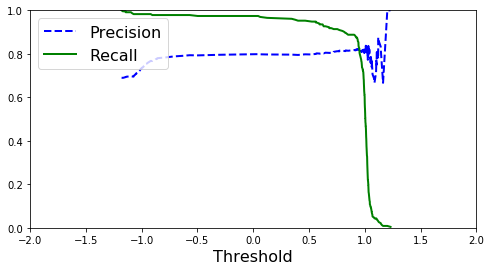

In [59]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_svm, recalls_svm, thresholds_svm)
plt.xlim([-2, 2])
#save_fig("precision_recall_vs_threshold_plot ")
plt.show()

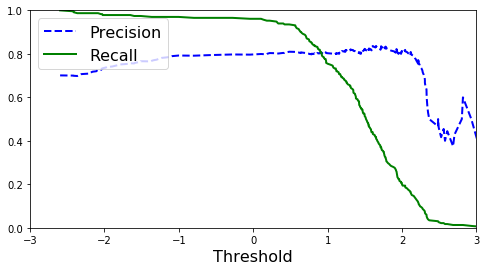

In [57]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_logreg, recalls_logreg, thresholds_logreg)
plt.xlim([-3, 3])
#save_fig("precision_recall_vs_threshold_plot ")
plt.show()

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

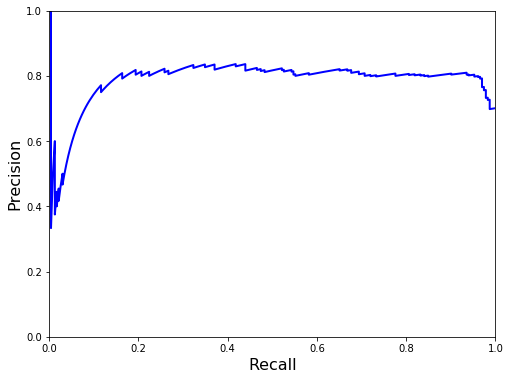

In [51]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_logreg, recalls_logreg)
#save_fig("precision_vs_recall_plot")
plt.show()

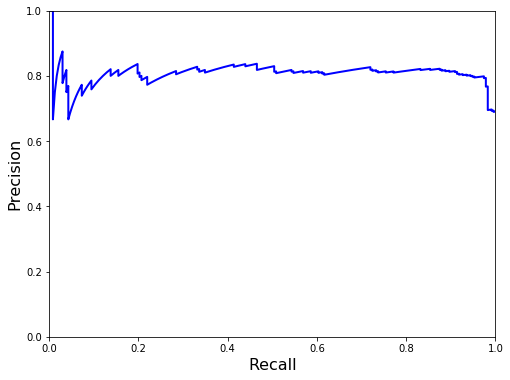

In [52]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_svm, recalls_svm)
#save_fig("precision_vs_recall_plot")
plt.show()

In [60]:
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, y_scores_svm[:,1])

In [63]:
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_train, y_scores_logreg[:,1])

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

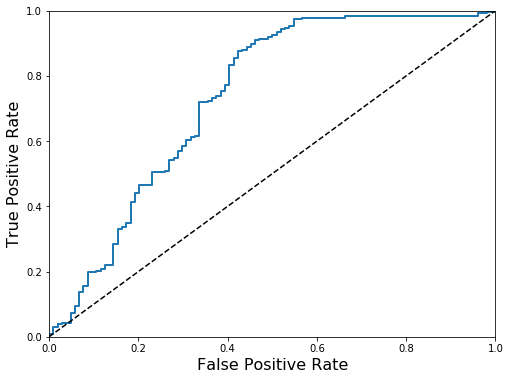

In [62]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_svm, tpr_svm)
#save_fig("roc_curve_plot")
plt.show()

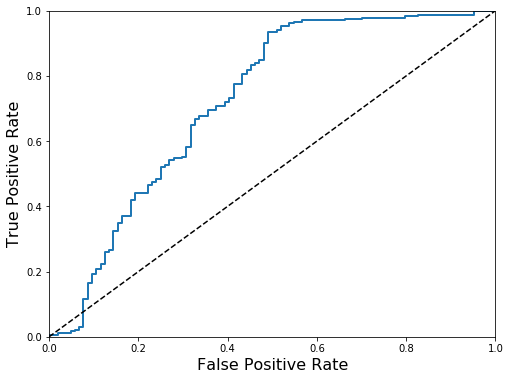

In [64]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_logreg, tpr_logreg)
#save_fig("roc_curve_plot")
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

print("SVM ROC_AUC: " + str(round(roc_auc_score(y_train,y_scores_svm[:,1]),2)))
print("Logistic Regression ROC_AUC: " + str(round(roc_auc_score(y_train,y_scores_logreg[:,1]),2)))

SVM ROC_AUC: 0.73
Logistic Regression ROC_AUC: 0.72


In [123]:
y_adjusted_rbf = (y_scores_svm[:,1] > 0.0)

In [99]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [124]:
print("Adjusted Recall: "  + str(round(recall_score(y_train,y_adjusted_rbf),2)))
print("Adjusted Precision: "  + str(round(precision_score(y_train,y_adjusted_rbf),2)))
print("Adjusted F1: "  + str(round(f1_score(y_train,y_adjusted_rbf),2)))

Adjusted Recall: 0.97
Adjusted Precision: 0.8
Adjusted F1: 0.88


In [126]:
cv_5 = cross_val_score(svm.SVC(),X_train,y_train,scoring='accuracy',cv=5)
cv_10 = cross_val_score(svm.SVC(),X_train,y_train,scoring='accuracy',cv=10)

print("SVM RBF Accuracy (CV 5): " + str(round(cv_5.mean(),2)))
print("SVM RBF Accuracy (CV 10): " + str(round(cv_10.mean(),2)))

SVM RBF Accuracy (CV 5): 0.81
SVM RBF Accuracy (CV 10): 0.81


In [127]:
from sklearn.model_selection import cross_val_predict

In [135]:
y_preds_rbf = cross_val_predict(svm_model_rbf,X_test,y_test,cv=6)
y_preds_logreg = cross_val_predict(logreg,X_test,y_test,cv=6)

In [136]:
print("Logistic Regression Cross Validation (CV = 5):")
print(classification_report(y_test,y_preds_logreg))

Logistic Regression Cross Validation (CV = 5):
             precision    recall  f1-score   support

          0       0.76      0.36      0.49        44
          1       0.77      0.95      0.85       100

avg / total       0.77      0.77      0.74       144



In [137]:
print("SVM Cross Validation (CV = 5):")
print(classification_report(y_test,y_preds_rbf))

SVM Cross Validation (CV = 5):
             precision    recall  f1-score   support

          0       1.00      0.36      0.53        44
          1       0.78      1.00      0.88       100

avg / total       0.85      0.81      0.77       144

